In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.ensemble import IsolationForest

In [2]:
# importing dataset
df = pd.read_csv(r'C:\Users\njhar\Downloads\creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# missing values/null values

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

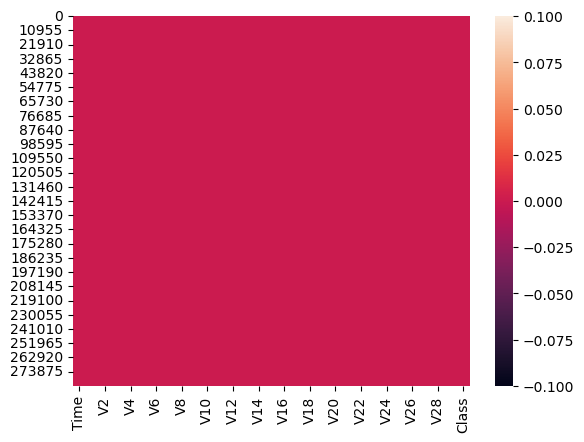

In [6]:
sns.heatmap(df.isnull())

In [7]:
# duplicated values

In [20]:
df.duplicated().sum()

1081

In [26]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [32]:
df = df.drop_duplicates()

In [33]:
df1 = df.copy()

In [34]:
df1.shape

(283726, 31)

In [28]:
# unique values

In [35]:
df1.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [17]:
# information about dataset

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [37]:
# descriptive statistics

In [38]:
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Text(0, 0.5, 'Frequency')

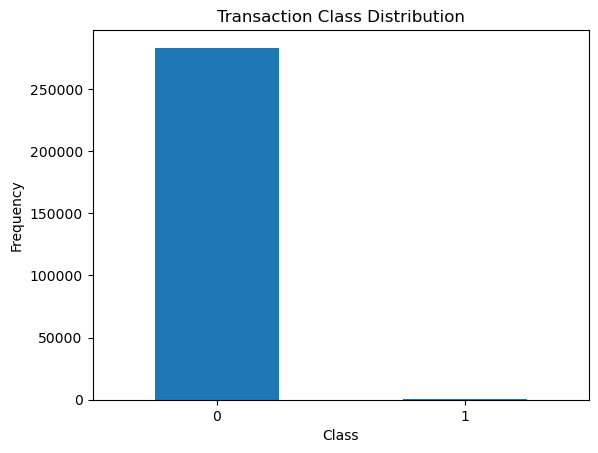

In [43]:
# Determine the number of fraud and valid transactions in the entire dataset

count_classes = pd.value_counts(df1['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")

In [45]:
# Assigning the transaction class "0 = NORMAL  & 1 = FRAUD"
Normal = df1[df1['Class']==0]
Fraud = df1[df1['Class']==1]

In [86]:
# False Datection Transaction

print("False Detection Transaction")
print("___________________________")
print(Normal.Amount.describe(),"\n")

#True Detection Transaction

print("True Detection Transaction")
print("___________________________")
print(Fraud.Amount.describe(),"\n")

False Detection Transaction
___________________________
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64 

True Detection Transaction
___________________________
count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64 



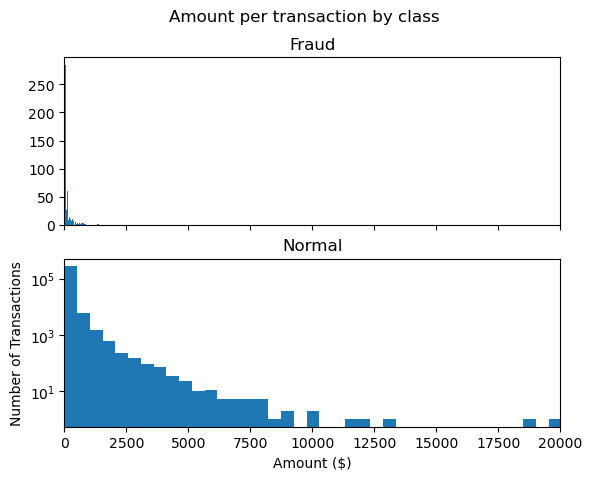

In [46]:
# fraud detection by transaction amount

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

In [41]:
# detecting anomalies using IsolationForest alogorithm

In [55]:
from sklearn.ensemble import IsolationForest

# Create the Isolation Forest object
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.01),
 max_features=1.0, random_state=42)

# Fit the data and tag the outliers
clf.fit(df1)

# Get the predictions
y_pred = clf.predict(df1)

# Reshape the predictions to a 1D array
y_pred = y_pred.reshape(-1,1)

# Print the number of outliers
print("Number of outliers:", len(df1[y_pred == -1]))

Number of outliers: 2838


In [51]:
# Evaluation and Model Selection

In [52]:
# Logistic Regression

In [59]:
#Assigning x and y data

X = df1.drop(['Class'],axis = 1)
y = df1['Class']

In [60]:
# train and test data spliting

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(226980, 30)
(56746, 30)
(226980,)
(56746,)


In [63]:
# Data Scaling using MinMaxScale

In [64]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# Model Building (Logistic Regression)

In [66]:
lr = LogisticRegression(C=0.01, solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [67]:
# Predict Test data
y_hat = lr.predict(X_test) 
print(y_hat)

[0 0 0 ... 0 0 0]


In [73]:
# Accuracy score

accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:", accuracy)

Accuracy: 0.998413985126705


In [74]:
# Classification Report
print("Classification Report :")
print(classification_report(y_test,y_hat))

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.00      0.00      0.00        90

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

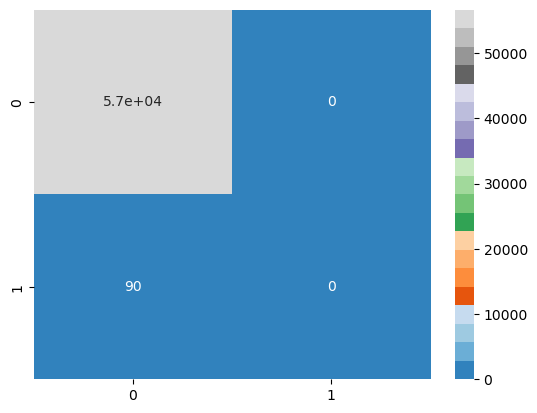

In [70]:
#Confusion matrix

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[0,1])
sns.heatmap(cnf_matrix, annot=True, cmap='tab20c')

In [75]:
# Model 2 using decision tree

In [77]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth =4 )
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
print("\n Predicted value:\n",predicted)


 Predicted value:
 [0 0 0 ... 0 0 0]


In [78]:
# Accuracy score

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

Accuracy: 0.999365594050682


In [79]:
# Classification Report
print("Classification Report :")
print(classification_report(y_test,predicted))

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.69      0.78        90

    accuracy                           1.00     56746
   macro avg       0.94      0.84      0.89     56746
weighted avg       1.00      1.00      1.00     56746



<Axes: >

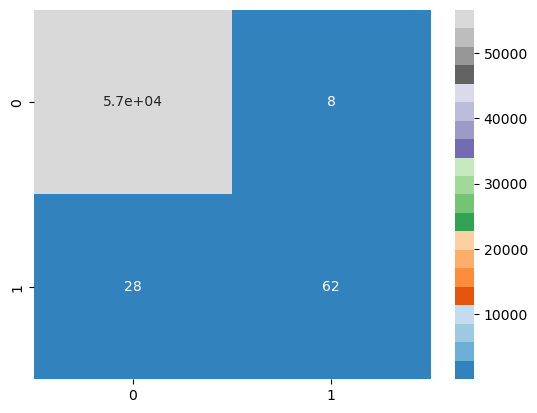

In [80]:
# Confusion matrix

cnf_matrix = confusion_matrix(y_test, predicted, labels=[0,1])
sns.heatmap(cnf_matrix, annot=True, cmap='tab20c')

In [84]:
#F1-Score
print('F1-Score')
fscore=f1_score(y_test, predicted, pos_label=1)*100
print("\n F1 Score :\n", fscore)

F1-Score

 F1 Score :
 77.5


In [82]:
# Precision
print('Precision')
precision=precision_score(y_test, predicted, pos_label=1)*100
print('\n Score Precision :\n',precision )

Precision

 Score Precision :
 88.57142857142857


In [83]:
# Recall
print("Recall")
recall=recall_score(y_test, predicted, pos_label=1)*100
print("\n Recall Score :\n", recall)

Recall

 Recall Score :
 68.88888888888889
